In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,NaN,0.67,NaN,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,NaN,0.44,NaN,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,NaN,0.47,NaN,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	259
float64		column 2	37
float64		column 3	296
float64		column 4	0
float64		column 5	0
float64		column 6	0
float64		column 7	0
float64		column 8	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1225.000000,1447.000000,1188.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.501673,0.499122,0.498207,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.138169,0.123705,0.083043,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.400000,0.420000,0.450000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,0.970000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

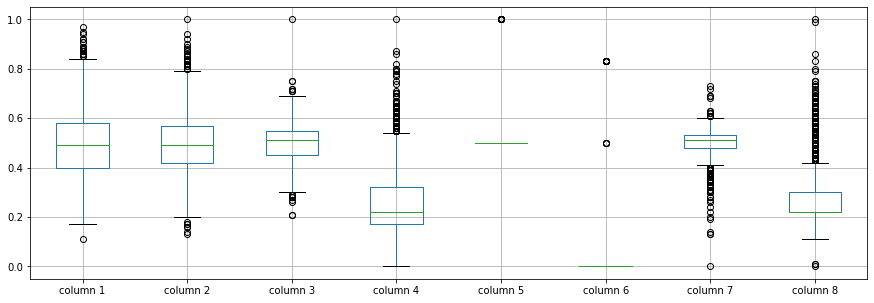

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.501673
column 2    0.499122
column 3    0.498207
column 4    0.261186
column 5    0.504717
column 6    0.007500
column 7    0.499885
column 8    0.276199
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.578820,-0.156432,0.190290,0.035640,0.000332,0.053862,-0.130102
column 2,0.578820,1.000000,-0.261628,0.127546,0.062361,-0.004004,0.094238,-0.109050
column 3,-0.156432,-0.261628,1.000000,0.042994,-0.003960,0.005451,-0.159192,-0.014566
column 4,0.190290,0.127546,0.042994,1.000000,-0.005931,-0.009040,-0.103591,-0.054797
column 5,0.035640,0.062361,-0.003960,-0.005931,1.000000,-0.009674,0.043627,0.002829
column 6,0.000332,-0.004004,0.005451,-0.009040,-0.009674,1.000000,0.020900,-0.035659
column 7,0.053862,0.094238,-0.159192,-0.103591,0.043627,0.020900,1.000000,0.089690
column 8,-0.130102,-0.109050,-0.014566,-0.054797,0.002829,-0.035659,0.089690,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+12,8+12+12,8+12+12+12,8+12+12+12+12,8+12+12+12+12+12,8+12+12+12+12+12+12,8+12+12+12+12+12,8+12+12+12+12,8+12+12+12,8+12+12,8+12,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.8746101182440054
Epoch: 1 , loss: 2.6205673269603564
Epoch: 2 , loss: 2.2890054285526276
Epoch: 3 , loss: 2.1475737937118695
Epoch: 4 , loss: 1.9881254784438922
Epoch: 5 , loss: 1.8702298636021821
Epoch: 6 , loss: 1.7887184399625529
Epoch: 7 , loss: 1.699850434842317
Epoch: 8 , loss: 1.617656745340513
Epoch: 9 , loss: 1.5638965990232385
Epoch: 10 , loss: 1.501733255127202
Epoch: 11 , loss: 1.4389355156732642
Epoch: 12 , loss: 1.4165594435256461
Epoch: 13 , loss: 1.388236323128576
Epoch: 14 , loss: 1.3510339506294415
Epoch: 15 , loss: 1.332370532595593
Epoch: 16 , loss: 1.3026468773250994
Epoch: 17 , loss: 1.2975676966750103
Epoch: 18 , loss: 1.2605858030526533
Epoch: 19 , loss: 1.210162601393202
Epoch: 20 , loss: 1.234281353328539
Epoch: 21 , loss: 1.232930675148964
Epoch: 22 , loss: 1.2077080575020418
Epoch: 23 , loss: 1.189122251842333
Epoch: 24 , loss: 1.184098649284114
Epoch: 25 , loss: 1.15899854

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.117888,0.0,0.066768,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,-0.105308,0.0,-0.096295,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1480,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1481,-0.089342,0.0,-0.175911,0.0,0.0,0.0,0.0,0.0
1482,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4.442015533995592, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.09470411737182705

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.61,0.470000,0.13,0.5,0.0,0.48,0.22
1,0.547888,0.67,0.546768,0.27,0.5,0.0,0.53,0.22
2,0.640000,0.62,0.490000,0.15,0.5,0.0,0.53,0.22
3,0.474692,0.44,0.473705,0.13,0.5,0.0,0.54,0.22
4,0.420000,0.44,0.480000,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.820000,0.63,0.470000,0.18,0.5,0.0,0.50,0.22
1480,0.350000,0.29,0.460000,0.14,0.5,0.0,0.54,0.66
1481,0.320658,0.47,0.324089,0.14,0.5,0.0,0.53,0.37
1482,0.510000,0.45,0.620000,0.25,0.5,0.0,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_AE_5(imp).xlsx", index=False, header=False)